In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit

In [3]:
f = open("seattle-weather.csv", "r")
df = pd.read_csv(f)

In [4]:
# Check for null values
df.isnull().any()
# Found zero null values

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [5]:
temp_max_df = df[["date", "temp_max"]].copy()

In [6]:
def date_to_days_since(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d').date()
    t = date - datetime(date.year, 1,1).date()
    return t.days

In [7]:
# Convert date to no. of days since 1 Jan of that year
temp_max_df["date"] = temp_max_df["date"].apply(date_to_days_since)

In [8]:
temp_max_df

,date,temp_max
0,0,12.8
1,1,10.6
2,2,11.7
3,3,12.2
4,4,8.9
...,...,...
1456,360,4.4
1457,361,5.0
1458,362,7.2
1459,363,5.6


In [9]:
X_train, X_test, y_train, y_test = train_test_split(temp_max_df["date"], temp_max_df["temp_max"], test_size=0.3)

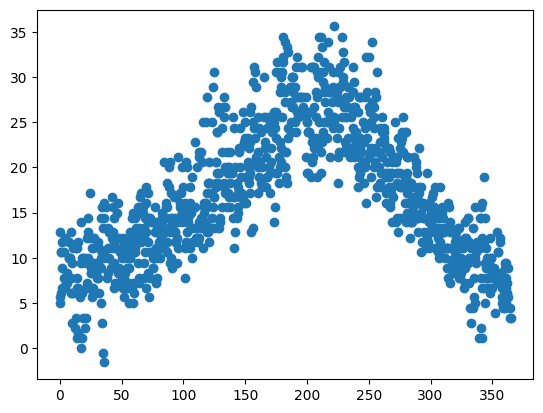

In [10]:
plt.scatter(X_train, y_train)

In [11]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train.values.reshape(-1,1))

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_poly_train, y_train.values)

LinearRegression()

In [14]:
X_poly_test = poly_features.transform(X_test.values.reshape(-1,1))

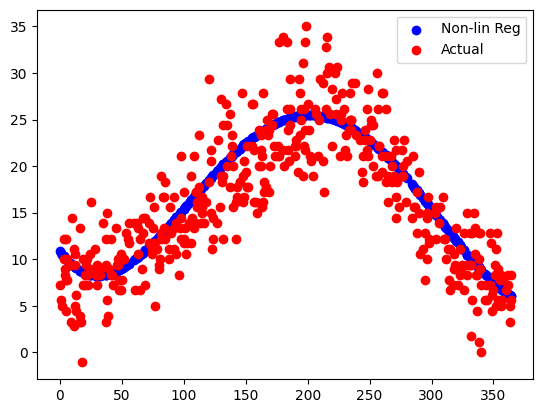

In [15]:
pred = model.predict(X_poly_test)

plt.scatter(X_test.values, pred, label="Non-lin Reg", color="b")
plt.scatter(X_test.values, y_test.values, label="Actual", color="r")
plt.legend()

In [16]:
model.predict(poly_features.transform([[date_to_days_since("2013-06-07")]]))

array([23.1771268])

In [17]:
r2_score(pred, y_test.values)

0.6759821489676578